# Import used modules

In [1]:
import pandas as pd
import sys
sys.path.insert(0, '../src')
import benchmark_utils as bu
import analysis_utils as au

/Users/julian/opt/anaconda3/envs/OpenCADDBenchmark/lib/python3.8/site-packages/MDAnalysis/coordinates/chemfiles.py:108: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  MIN_CHEMFILES_VERSION = LooseVersion("0.9")


# Run Alignments for OpenCADD.superposition for the TKL and CMGC Structures

Perform all pairwise alignments for the given sample structures. Every method performs 2500 alignments for the 50 tyrosine kinase like and 50 CMGC structures. The benchmark is done with an Intel Core i5-1038NG7 CPU and 16 GB of RAM.

In [2]:
#bu.run_alignments(sample1_path="../data/samples/TKL_samples.txt", 
#                  sample2_path="../data/samples/CMGC_samples.txt", 
#                  output_path="../data/OpenCADD_results/<NAME_OF_FILE>")

# Create a Dataframe containing the Alignments of all five Methods

The alignments for PyMol and ChimeraX MatchMaker are done in the respectively programs and are saved in seperate files. For the analysis, the DataFrames are combined.

In [3]:
columns = ["reference_id", "mobile_id", "method", "rmsd", 
           "coverage", "reference_size", "mobile_size", "time", 
           "SI", "MI", "SAS", "ref_name", "ref_group", "ref_species", 
           "ref_chain", "mob_name", "mob_group", "mob_species", "mob_chain"]
superposer_TKL_CMGC = pd.read_csv("../data/OpenCADD_results/superposer_benchmark_TKL_CMGC.csv", names=columns)
pymol_TKL_CMGC = pd.read_csv("../data/PyMol_results/pymol_benchmark_TKL_CMGC.csv", names=columns)
chimerax_TKL_CMGC = pd.read_csv("../data/ChimeraX_results/mmaker_benchmark_TKL_CMGC.csv", names=columns)
all_TKL_CMGC = pd.concat([superposer_TKL_CMGC, pymol_TKL_CMGC, chimerax_TKL_CMGC]).reset_index(drop=True)

### Compute the relative Coverage

The relative coverage is computed the following way:

coverage / min(lenght of structure 1, lenght of structure 2)

In [4]:
au.compute_rel_cov(all_TKL_CMGC)

# Analysis

## General Checks

In [5]:
counts, nans, times = au.general_checks(all_TKL_CMGC)

Check if every value is present.
It should be 2500 for every value, because there are 2500 alignments performed per method.

In [6]:
counts

,reference_id,mobile_id,rmsd,coverage,reference_size,mobile_size,time,SI,MI,SAS,ref_name,ref_group,ref_species,ref_chain,mob_name,mob_group,mob_species,mob_chain,rel_cov
method,,,,,,,,,,,,,,,,,,,
matchmaker,2500,2500,2500,2500,2500,2500,2500,2500,2500,2500,2500,2500,2500,2500,2500,2500,2500,2500,2500
mda,2500,2500,2500,2500,2500,2500,2500,2500,2500,2500,2500,2500,2500,2500,2500,2500,2500,2500,2500
mmligner,2500,2500,2450,2450,2450,2450,2450,2450,2450,2450,2500,2500,2500,2500,2500,2500,2500,2500,2450
pymol,2500,2500,2500,2500,2500,2500,2500,2500,2500,2500,2500,2500,2500,2500,2500,2500,2500,2500,2500
theseus,2500,2500,2500,2500,2500,2500,2500,2500,2500,2500,2500,2500,2500,2500,2500,2500,2500,2500,2500


Next, we check for missing alignments. Some Methods have problems with some structures. 

In this case, 50 alignments for MMLigner are missing. All of them are with the structure 4fv3 of ERK2.
These entries are removed from the DataFrame for further analysis.

In [7]:
nans

,reference_id,mobile_id,rmsd,coverage,reference_size,mobile_size,time,SI,MI,SAS,ref_name,ref_group,ref_species,ref_chain,mob_name,mob_group,mob_species,mob_chain,rel_cov
method,,,,,,,,,,,,,,,,,,,
mmligner,50,50,0,0,0,0,0,0,0,0,50,50,50,50,50,50,50,50,0


In [8]:
all_TKL_CMGC[all_TKL_CMGC["rmsd"].isna()]

,reference_id,mobile_id,method,rmsd,coverage,reference_size,mobile_size,time,SI,MI,SAS,ref_name,ref_group,ref_species,ref_chain,mob_name,mob_group,mob_species,mob_chain,rel_cov
2538,3h9r,4fv3,mmligner,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ALK2,TKL,Human,A,Erk2,CMGC,Human,A,NaN
2588,3mtf,4fv3,mmligner,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ALK2,TKL,Human,A,Erk2,CMGC,Human,A,NaN
2638,5ita,4fv3,mmligner,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BRAF,TKL,Human,A,Erk2,CMGC,Human,A,NaN
2688,1py5,4fv3,mmligner,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TGFbR1,TKL,Human,A,Erk2,CMGC,Human,A,NaN
2738,5j7b,4fv3,mmligner,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,RIPK2,TKL,Human,A,Erk2,CMGC,Human,A,NaN
2788,4ehg,4fv3,mmligner,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BRAF,TKL,Human,A,Erk2,CMGC,Human,A,NaN
2838,5e8u,4fv3,mmligner,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TGFbR1,TKL,Human,A,Erk2,CMGC,Human,A,NaN
2888,5qtz,4fv3,mmligner,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TGFbR1,TKL,Human,A,Erk2,CMGC,Human,A,NaN
2938,5oy6,4fv3,mmligner,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ALK2,TKL,Human,A,Erk2,CMGC,Human,A,NaN
2988,3s95,4fv3,mmligner,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LIMK1,TKL,Human,A,Erk2,CMGC,Human,A,NaN


In [9]:
all_TKL_CMGC = all_TKL_CMGC.dropna()

During the computation of the alignments, the time is measured.  For all OpenCADD methods combined the CPU-time is just under 14.5 hours. The time for downloading the structures is not included.
PyMol align took about a minute.

In [10]:
times

method
matchmaker     17.86
mda            18.79
mmligner      840.34
pymol           1.13
theseus        15.39
Name: time, dtype: float64

### Compute Mean and Median

In [11]:
mean, median = au.compute_mean_median(all_TKL_CMGC)

In [12]:
mean

,rmsd,coverage,reference_size,mobile_size,time,SI,MI,SAS,rel_cov
method,,,,,,,,,
matchmaker,8.4059,249.4536,286.42,314.2800,0.4286,9.5474,0.8568,3.3605,0.8800
mda,11.3033,253.6844,286.16,313.9600,0.4511,12.6587,0.8920,4.4605,0.8956
mmligner,1.9652,206.9551,286.16,313.2857,20.5798,2.6867,0.6814,0.9483,0.7310
pymol,8.8732,205.3364,286.42,314.2800,0.0270,12.3300,0.8904,4.3516,0.7253
theseus,12.0688,253.7596,286.16,313.9600,0.3693,13.5111,0.8982,4.7620,0.8958


In [13]:
median

,rmsd,coverage,reference_size,mobile_size,time,SI,MI,SAS,rel_cov
method,,,,,,,,,
matchmaker,8.0620,249.0,286.0,299.5,0.3901,9.2940,0.8642,3.1901,0.8746
mda,11.2663,253.0,286.0,299.0,0.4406,12.8245,0.8967,4.4805,0.8924
mmligner,1.9375,207.0,286.0,297.0,20.4958,2.6362,0.6836,0.9255,0.7292
pymol,8.8300,207.0,286.0,299.5,0.0255,11.7264,0.8904,4.1654,0.7351
theseus,12.0122,253.0,286.0,299.0,0.3328,13.5435,0.9017,4.7753,0.8924


## Create basic plots

It is easy to see in both plots, that MMLigner performs the best in terms of RMSD. Besides that, Theseus and MDA perform similar to ChimeraX Matchmaker for the relative coverage but have higher RMSD values.

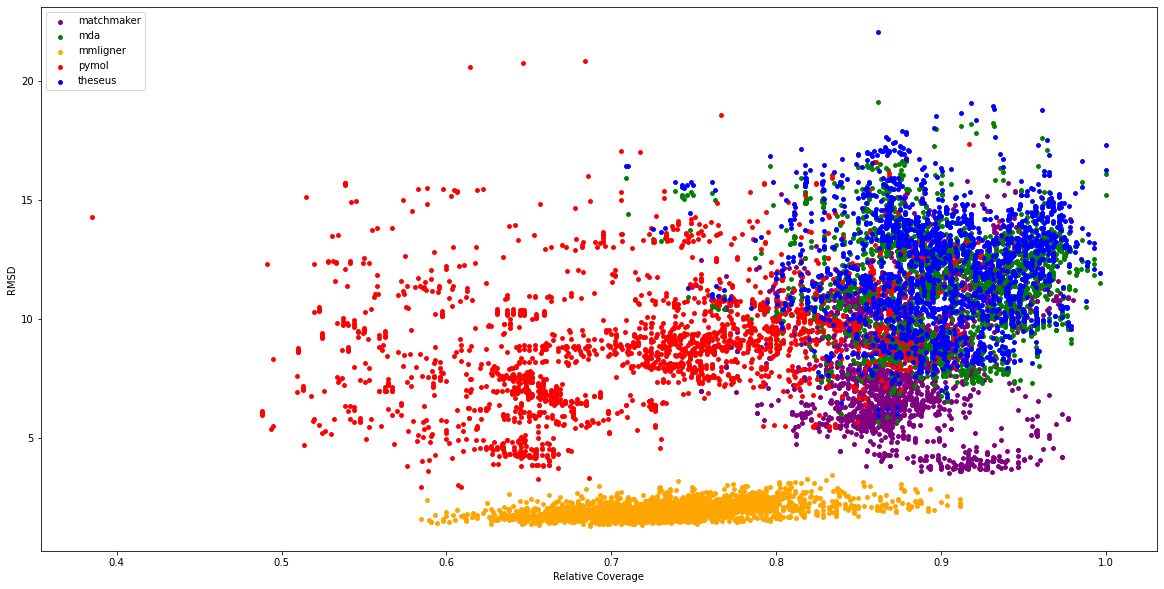

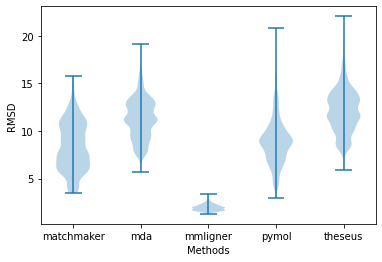

In [14]:
au.create_scatter_plot(all_TKL_CMGC)
au.create_violine_plot(all_TKL_CMGC)

## Check if data is normally distributed

The Kolmogorov-Smirnow-Test shows, that the values for RMSD, SI, MI, SAS and relative coverage are not normally distributed. 

MMLigner performs the best for all measures except the relative coverage. 
Theseus and MDA perform in the same range for the quality measures compared to PyMol, with PyMol being sligthly superior. For the relative coverage, ChimeraX Matchmaker, Theseus and MDA have distributions in the same range.

Results of kstest:
KstestResult(statistic=0.9254449554165203, pvalue=0.0)
KstestResult(statistic=0.9744262715631392, pvalue=0.0)
KstestResult(statistic=0.7295502946426135, pvalue=0.0)
KstestResult(statistic=0.7674159976342324, pvalue=0.0)


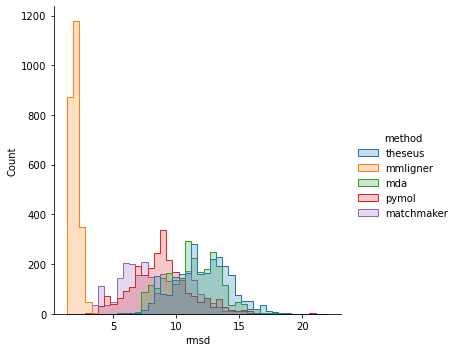

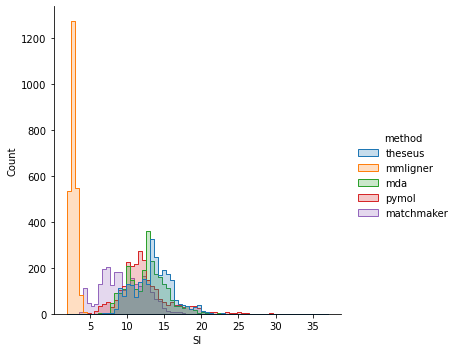

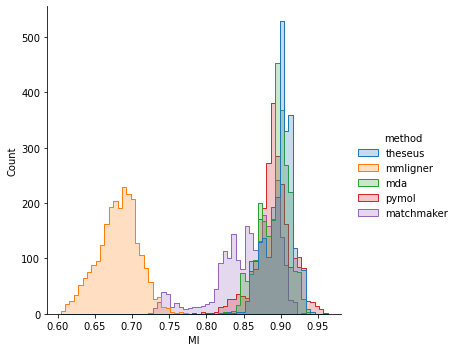

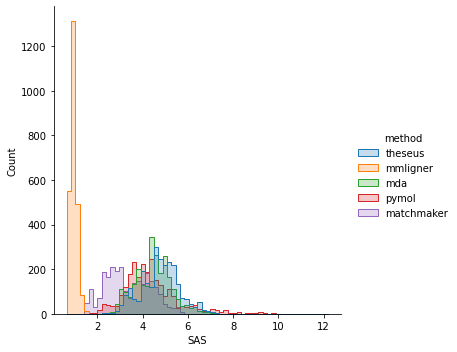

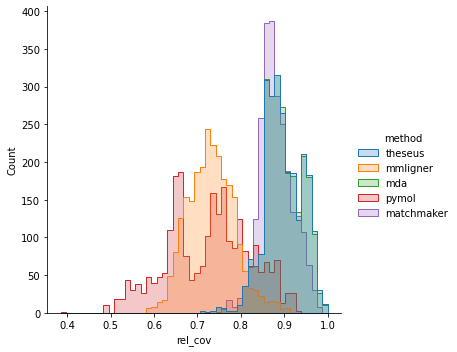

In [15]:
dist_tests = au.check_distribution(all_TKL_CMGC)

## Compute Correlation

Since the data is not distributed normally, the spearman correlation is used.

The three quality measures correlate very well with each other and with the rmsd. The quality measures also positively correlate with the relative coverage, which means, the higher the relative coverage, the higher the quality measures. 

The time also negatively correlates with the quality measures, which means taking more time for an alignment produces better results. This correlation in this case is highly biased by MMLigner. It takes much more time than the other methods, but also yield overall the best results.

All three quality measures share the property, that lower values mean better alignments.

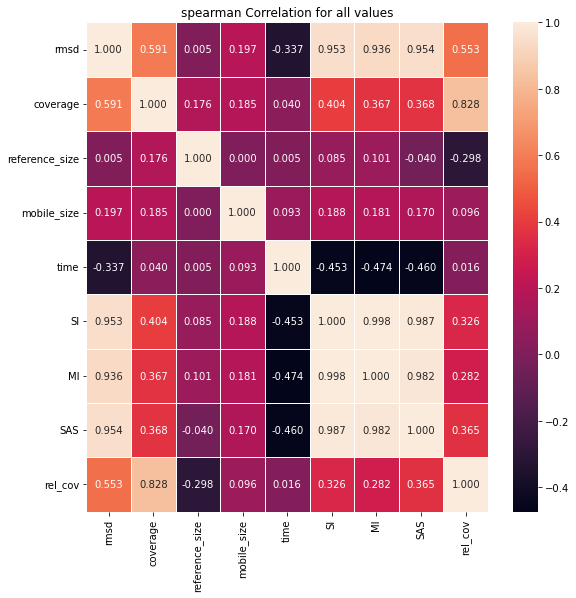

,rmsd,coverage,reference_size,mobile_size,time,SI,MI,SAS,rel_cov
rmsd,1.000000,0.590893,0.004550,0.196640,-0.337154,0.952960,0.935537,0.953828,0.552697
coverage,0.590893,1.000000,0.175904,0.184547,0.039752,0.404078,0.367296,0.368384,0.827639
reference_size,0.004550,0.175904,1.000000,0.000313,0.004660,0.084780,0.100551,-0.040337,-0.298475
mobile_size,0.196640,0.184547,0.000313,1.000000,0.092906,0.187879,0.181029,0.169561,0.096388
time,-0.337154,0.039752,0.004660,0.092906,1.000000,-0.452848,-0.473513,-0.460118,0.015874
SI,0.952960,0.404078,0.084780,0.187879,-0.452848,1.000000,0.997856,0.986652,0.325783
MI,0.935537,0.367296,0.100551,0.181029,-0.473513,0.997856,1.000000,0.982102,0.282238
SAS,0.953828,0.368384,-0.040337,0.169561,-0.460118,0.986652,0.982102,1.000000,0.365186
rel_cov,0.552697,0.827639,-0.298475,0.096388,0.015874,0.325783,0.282238,0.365186,1.000000


In [16]:
corr = au.compute_correlation(all_TKL_CMGC, coeff="spearman")
corr

## Check for significant differences

Because the data is not normally distributed, an ANOVA is not suitable. Therefore the Kruskal-Wallis-Test is performed. The RMSD and the three quality measures are significantly different for the groups.

In [17]:
kruskal = au.compute_kruskal(all_TKL_CMGC)

Kruskal Wallis results for RMSD:
KruskalResult(statistic=7956.44914689631, pvalue=0.0)


Kruskal Wallis results for Similarity Index (SI):
KruskalResult(statistic=7314.422757162554, pvalue=0.0)


Kruskal Wallis results for Match Index (MI):
KruskalResult(statistic=7298.412441222088, pvalue=0.0)


Kruskal Wallis results for Structural Alignment Score (SAS):
KruskalResult(statistic=7370.70940247276, pvalue=0.0)


## Which groups are different

The statistics show, that all groups are significantly different from each other. Looking at the diagrams above it is still noticable, PyMol has lower RMSD values than Theseus and MDA but also lower relative coverages, resulting in a almost similar distribution in all three quality measures.

In [18]:
significant, non_significant = au.compute_mannwhitneyu(all_TKL_CMGC)

All significant results:
Result for rmsd with theseus and pymol:
MannwhitneyuResult(statistic=5255165.0, pvalue=0.0)
Result for rmsd with theseus and mmaker:
MannwhitneyuResult(statistic=5334996.5, pvalue=0.0)
Result for rmsd with theseus and mmligner:
MannwhitneyuResult(statistic=6125000.0, pvalue=0.0)
Result for rmsd with theseus and mda:
MannwhitneyuResult(statistic=3750907.0, pvalue=1.4137078083560455e-34)
Result for rmsd with pymol and mmaker:
MannwhitneyuResult(statistic=3445577.0, pvalue=3.35617983529421e-10)
Result for rmsd with pymol and mmligner:
MannwhitneyuResult(statistic=6124935.0, pvalue=0.0)
Result for rmsd with pymol and mda:
MannwhitneyuResult(statistic=1348452.0, pvalue=1.7410269978066008e-265)
Result for rmsd with mmaker and mmligner:
MannwhitneyuResult(statistic=6125000.0, pvalue=0.0)
Result for rmsd with mmaker and mda:
MannwhitneyuResult(statistic=1234763.0, pvalue=2.88462406981128e-300)
Result for rmsd with mmligner and mda:
MannwhitneyuResult(statistic=0.0, pva

# Count the best alignments

For every pair of structures, the method that has the best quality measure is selected. The following statistics show how often a method had the best results for the quality measures.

In [19]:
best_results = au.count_best_results(all_TKL_CMGC)

Counts of best values for the Similarity Index (SI):
mmligner      2450
matchmaker      27
pymol           17
mda              6
Name: method, dtype: int64


Counts of best values for the Match Index (MI):
mmligner      2450
matchmaker      33
pymol           11
mda              6
Name: method, dtype: int64


Counts of best values for the Structural Alignment Score (SAS):
mmligner      2450
matchmaker      27
pymol           17
mda              6
Name: method, dtype: int64


Counts of best values for the Similarity Index (SI) without MMLigner:
matchmaker    1739
pymol          476
mda            285
Name: method, dtype: int64


Counts of best values for the Match Index (MI) without MMLigner:
matchmaker    1816
pymol          373
mda            311
Name: method, dtype: int64


Counts of best values for the Structural Alignment Score (SAS) without MMLigner:
matchmaker    1740
pymol          476
mda            284
Name: method, dtype: int64
